## 1. Error Function

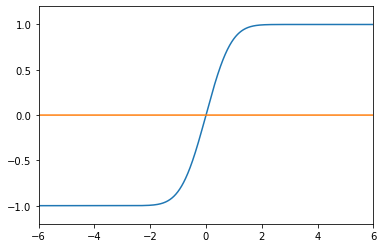

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

x = np.arange(-8,8,0.01)
t = np.arange(-8,8,0.01)
def erf(t):
    return (2/np.sqrt(np.pi))*np.exp(-t**2)

plt.xlim(-6,6);plt.ylim(-1.2,1.2)
plt.plot(t,[integrate.quad(erf,0,i)for i in x]);

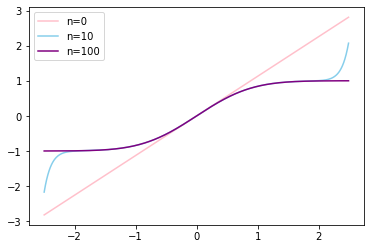

In [33]:
import math

x = np.arange(-2.5,2.5,0.01)

def f(x,n):
    i,s=0,0
    while(i<=n):
        s=s+(2/np.pi**(1/2))*((-1)**i)*x**(2*i+1)/((2*i+1)*math.factorial(i))
        i=i+1
    return s

plt.plot(x,f(x,0),color='pink',label='n=0');
plt.plot(x,f(x,10),color='skyblue',label='n=10');
plt.plot(x,f(x,100),color='purple',label='n=100');
plt.legend();

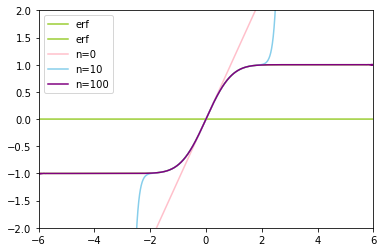

In [42]:
plt.xlim(-6,6);plt.ylim(-2,2)
plt.plot(t,[integrate.quad(erf,0,i)for i in x],label='erf',color='yellowgreen');
plt.plot(x,f(x,0),color='pink',label='n=0');
plt.plot(x,f(x,10),color='skyblue',label='n=10');
plt.plot(x,f(x,100),color='purple',label='n=100');
plt.legend();

## 2. (Integration) Trigonometric Function

- trapezoidal 방법

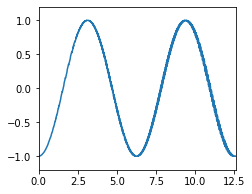

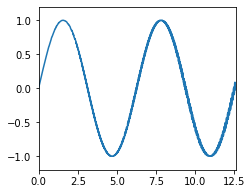

In [43]:
def sf(t):
    return np.sin(t)

def trapez(f,a,b,n):
    s, t, dt = -1, a, (b-a)/n
    while(t<b):
        s += dt*(0.5*sf(t)+0.5*sf(t+dt))
        t = t + dt
    return s

plt.figure(figsize=(12,3));
plt.subplot(1,3,1)
x = np.arange(0,4*np.pi,0.01)
t = np.arange(0,4*np.pi,0.01)
plt.xlim(0,4*np.pi);plt.ylim(-1.2,1.2)
plt.plot(t,[trapez(sf,0,i,100)for i in x]);


def cf(t):
    return np.cos(t)

def trapez(f,a,b,n):
    s, t, dt = 0, a, (b-a)/n
    while(t<b):
        s += dt*(0.5*cf(t)+0.5*cf(t+dt))
        t = t + dt
    return s

plt.figure(figsize=(12,3));
plt.subplot(1,3,2)
x = np.arange(0,4*np.pi,0.01)
t = np.arange(0,4*np.pi,0.01)
plt.xlim(0,4*np.pi);plt.ylim(-1.2,1.2)
plt.plot(t,[trapez(cf,0,i,100)for i in x]);

- scipy.integrate 함수

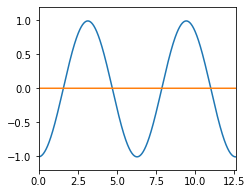

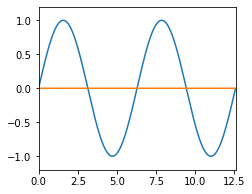

In [29]:
def sf(t):
    return np.sin(t)

plt.figure(figsize=(12,3));
plt.subplot(1,3,1)
x = np.arange(0,4*np.pi,0.01)
t = np.arange(0,4*np.pi,0.01)
plt.xlim(0,4*np.pi);plt.ylim(-1.2,1.2)
plt.plot(t,[integrate.quad(sf,-1.58,i)for i in x]);

def cf(t):
    return np.cos(t)

plt.figure(figsize=(12,3));
plt.subplot(1,3,2)
x = np.arange(0,4*np.pi,0.01)
t = np.arange(0,4*np.pi,0.01)
plt.xlim(0,4*np.pi);plt.ylim(-1.2,1.2)
plt.plot(t,[integrate.quad(cf,0,i)for i in x]);

## 3. (Differentiation) Trigonometric Function

- finite difference 방법

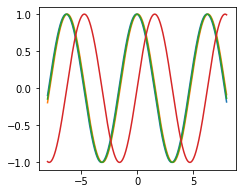

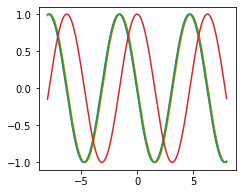

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-8,8,0.01)
def sf(x):
    return np.sin(x)

def trapez(sf,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*sf(x)+0.5*sf(x+dx))
        x = x + dx
    return s

def for_diff(sf,x,dx):
    return (sf(x+dx)-sf(x))/dx
def back_diff(sf,x,dx):
    return (sf(x)-sf(x-dx))/dx
def cen_diff(sf,x,dx):
    return (sf(x+dx/2)-sf(x-dx/2))/dx

dx=0.1
x=np.arange(-8,8,0.01)
diff1=[for_diff(sf,i,dx) for i in x]
diff2=[back_diff(sf,i,dx) for i in x]
diff3=[cen_diff(sf,i,dx) for i in x]

plt.figure(figsize=(12,3));
plt.subplot(1,3,1)
plt.plot(x,diff1)
plt.plot(x,diff2)
plt.plot(x,diff3)
plt.plot(x,sf(x));




def cf(x):
    return np.cos(x)

def trapez(cf,a,b,n):
    s, x, dx = 0, a, (b-a)/n
    while(x<b):
        s += dx*(0.5*cf(x)+0.5*cf(x+dx))
        x = x + dx
    return s

def for_diff(cf,x,dx):
    return (cf(x+dx)-cf(x))/dx
def back_diff(cf,x,dx):
    return (cf(x)-cf(x-dx))/dx
def cen_diff(cf,x,dx):
    return (cf(x+dx/2)-cf(x-dx/2))/dx


dx=0.1
x=np.arange(-8,8,0.01)
diff1=[for_diff(cf,i,dx) for i in x]
diff2=[back_diff(cf,i,dx) for i in x]
diff3=[cen_diff(cf,i,dx) for i in x]

plt.figure(figsize=(12,3));
plt.subplot(1,3,2)
plt.plot(x,diff1)
plt.plot(x,diff2)
plt.plot(x,diff3)
plt.plot(x,cf(x));

- scipy.misc.derivative 함수

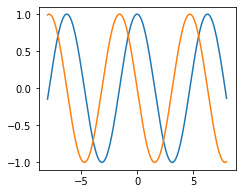

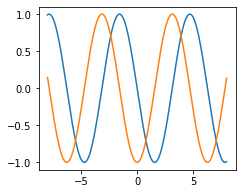

In [44]:
from scipy.misc import derivative
plt.figure(figsize=(12,3));
plt.subplot(1,3,1)
plt.plot(x,[derivative(np.sin,i,dx=0.01) for i in x]);
plt.plot(x,[derivative(np.sin,i,dx=0.01,n=2) for i in x]);

plt.figure(figsize=(12,3));
plt.subplot(1,3,2)
plt.plot(x,[derivative(np.cos,i,dx=0.01) for i in x]);
plt.plot(x,[derivative(np.cos,i,dx=0.01,n=2) for i in x]);